# 巡回型Lotka-Volterra方程式
p+q+r=1とする生物種の時間変化を記述する方程式、
$$
\begin{align}
\frac { \mathrm { d } } { \mathrm { d } t } \left( \begin{array} { l } { p ( t ) } \\ { q ( t ) } \\ { r ( t ) } \end{array} \right) = \left( \begin{array} { l } { p ( t ) ( q ( t ) - r ( t ) ) } \\ { q ( t ) ( r ( t ) - p ( t ) ) } \\ { r ( t ) ( p ( t ) - q ( t ) ) } \end{array} \right)
\end{align}
$$
を陽的Euler法で離散化すると、
$$
\begin{align}
\frac { 1 } { h } \left( \begin{array} { l } { p _ { n + 1 } - p _ { n } } \\ { q _ { n + 1 } - q _ { n } } \\ { r _ { n + 1 } - r _ { n } } \end{array} \right) = \left( \begin{array} { c } { p _ { n } \left( q _ { n } - r _ { n } \right) } \\ { q _ { n } \left( r _ { n } - p _ { n } \right) } \\ { r _ { n } \left( p _ { n } - q _ { n } \right) } \end{array} \right)
\end{align}
$$

この式は刻み幅h<1/2のときに、任意の初期値から初めて、p,q,rはそれぞれ(0:1)に収まる。
離散化前はpqr=一定である。したがって、pq面ではpqr=一定の式をp+q+r=1で切断して射影した軌跡が見える。一方、離散化すると、pqrは狭義単調減少であるため、射影した軌跡はじょじょに大きくなり、二等辺三角形にへばりつく。

In [1]:
using Gadfly
h = 0.5
function explicit_euler(p,q,r)
    p_new = p+h*p*(q-r)
    q_new = q+h*q*(r-p)
    r_new = r+h*r*(p-q)
    return p_new, q_new, r_new
end
function LV(p,q,r)
    pq = [p, q]
    num =200
    for i in 1:num
        p,q,r = explicit_euler(p,q,r)
        pq = hcat(pq, [p,q])
    end
    set_default_plot_size(8cm, 8cm)
    plot(x=pq[1,1:num+1],y=pq[2,1:num+1],Guide.xlabel("p"),Guide.ylabel("q"))
end

LV (generic function with 1 method)

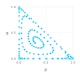

In [2]:
LV(0.3, 0.3, 0.4)

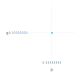

In [3]:
LV(1/3,1/3,1/3) #定常解